# Initialization
A well chosen initialization can:
- Speed up the convergence of gradient descent
- Increase the odds of gradient descent converging to a lower training (and generalization) error 

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
from init_utils import sigmoid, relu, compute_loss, forward_propagation, backward_propagation, update_parameters, predict, predict_dec, load_dataset, plot_decision_boundary

# Some defaults for this notebook
%matplotlib inline
plt.rcParams['figure.figsize'] = (7.0, 4.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [2]:
# Load Datasets for blue/red dots in circle
train_X, train_Y, test_X, test_Y = load_dataset()

# There are three ways to initialize the parameters
    1.) Initialize with zeros
    2.) Initialize with randam values
    3.) He Initialization -> This initializes the weights to random values scaled according to a paper by He et al., 2015

In [3]:
# 1.) Initialize with Zeros
def initialize_parameters_zeros(layers_dims):
    params = {}
    L = len(layers_dims)
    for l in range(1, L):
        params['W' + str(l)] = np.zeros((layers_dims[l], layers_dims[l-1]))
        params['b' + str(l)] = np.zeros((layers_dims[l], 1))
    return params

In [4]:
params = initialize_parameters_zeros([4,3,2,1])
print('Zero Initialization : ', (params))

Zero Initialization :  {'W1': array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]]), 'b1': array([[0.],
       [0.],
       [0.]]), 'W2': array([[0., 0., 0.],
       [0., 0., 0.]]), 'b2': array([[0.],
       [0.]]), 'W3': array([[0., 0.]]), 'b3': array([[0.]])}


In [5]:
# 2.) Random Initialization
def initialize_parameters_random(layers_dims):
    np.random.seed(3)
    params = {}
    L = len(layers_dims)
    for l in range(1, L):
        params['W' + str(l)] = np.random.randn(layers_dims[l], layers_dims[l-1]) * 10
        params['b' + str(l)] = np.zeros((layers_dims[l], 1))
    return params

In [6]:
params = initialize_parameters_random([3,2,1])
print('Random Initialization : ', (params))

Random Initialization :  {'W1': array([[ 17.88628473,   4.36509851,   0.96497468],
       [-18.63492703,  -2.77388203,  -3.54758979]]), 'b1': array([[0.],
       [0.]]), 'W2': array([[-0.82741481, -6.27000677]]), 'b2': array([[0.]])}


In [7]:
# 3.) He Initialization
def initialize_parameters_he(layers_dims):
    import math

    np.random.seed(3)
    params = {}
    L = len(layers_dims) - 1
    for l in range(1, L+1):
        params['W' + str(l)] = np.random.randn(layers_dims[l], layers_dims[l-1]) * math.sqrt(2./layers_dims[l-1])
        params['b' + str(l)] = np.zeros((layers_dims[l], 1)) * math.sqrt(2./layers_dims[l-1])
    return params

In [8]:
params = initialize_parameters_he([2, 4,1])
print('He Initialization : ', (params))

He Initialization :  {'W1': array([[ 1.78862847,  0.43650985],
       [ 0.09649747, -1.8634927 ],
       [-0.2773882 , -0.35475898],
       [-0.08274148, -0.62700068]]), 'b1': array([[0.],
       [0.],
       [0.],
       [0.]]), 'W2': array([[-0.03098412, -0.33744411, -0.92904268,  0.62552248]]), 'b2': array([[0.]])}


In [9]:
# Now we need NN model to test all these 3 initialization methods
def NN_model(X, Y, lr = 0.01, n_iter = 10000, pc = False, init = 'zeros'):
    grads = {}
    costs = []
    m = X.shape[1]
    layers_dims = [X.shape[0], 10, 5, 1]

    # Initialization
    if init == 'zeros':
        params = initialize_parameters_zeros(layers_dims)
    elif init == 'random':
        params = initialize_parameters_random(layers_dims)
    elif init == 'he':
        params = initialize_parameters_he(layers_dims)
    
    # Loop for gradient descent
    for i in range(0, n_iter):
        a3, cache = forward_propagation(X, params)
        cost = compute_loss(a3, Y)
        grads = backward_propagation(X, Y, cache)
        params = update_parameters(params, grads, lr)

        # Print Cost every 1000 iterations
        if pc and i % 1000 == 0:
            print("Cost after iteration {}: {}".format(i, cost))
            costs.append(cost)
    # Plot the loss
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('iterations per hundreds')
    plt.title("Learning rate =" + str(lr))
    plt.show()
    
    return params



Cost after iteration 0: 0.6931471805599453
Cost after iteration 1000: 0.6931471805599453
Cost after iteration 2000: 0.6931471805599453
Cost after iteration 3000: 0.6931471805599453
Cost after iteration 4000: 0.6931471805599453
Cost after iteration 5000: 0.6931471805599453
Cost after iteration 6000: 0.6931471805599453
Cost after iteration 7000: 0.6931471805599453
Cost after iteration 8000: 0.6931471805599453
Cost after iteration 9000: 0.6931471805599453
Cost after iteration 10000: 0.6931471805599455
Cost after iteration 11000: 0.6931471805599453
Cost after iteration 12000: 0.6931471805599453
Cost after iteration 13000: 0.6931471805599453
Cost after iteration 14000: 0.6931471805599453


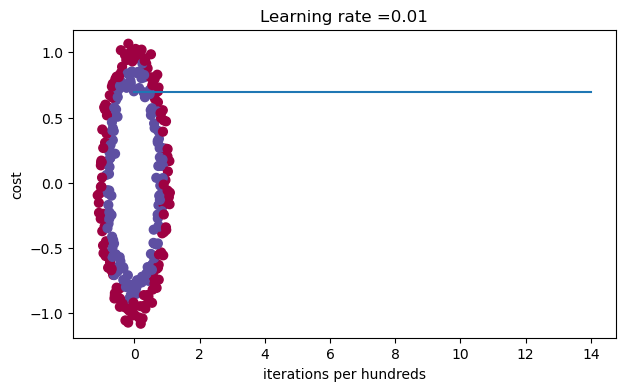

On the train set:
Accuracy: 0.5
On the test set:
Accuracy: 0.5


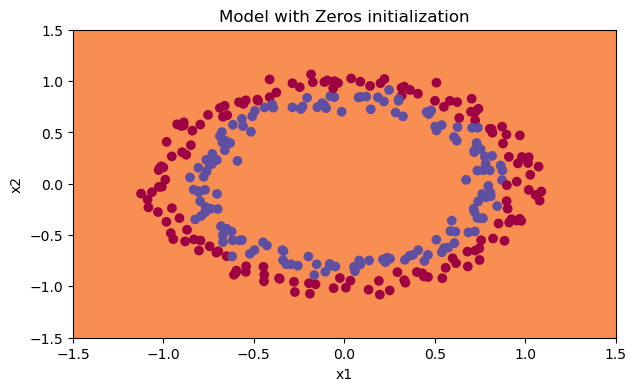

In [10]:
# For Zero Initialization
params = NN_model(train_X, train_Y, lr = 0.01, n_iter = 15000, pc = True, init = "zeros")
print ("On the train set:")
predictions_train = predict(train_X, train_Y, params)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, params)

plt.title("Model with Zeros initialization")
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
plot_decision_boundary(lambda x: predict_dec(params, x.T), train_X, train_Y)

Cost after iteration 0: inf


/home/kumar/Code/MyCode/ML_Concepts_Revision/Initialization/init_utils.py:145: RuntimeWarning: divide by zero encountered in log
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)
/home/kumar/Code/MyCode/ML_Concepts_Revision/Initialization/init_utils.py:145: RuntimeWarning: invalid value encountered in multiply
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)


Cost after iteration 1000: 0.6252352612638843
Cost after iteration 2000: 0.5981497077576681
Cost after iteration 3000: 0.563871230873084
Cost after iteration 4000: 0.5501652521757332
Cost after iteration 5000: 0.5444388786325469
Cost after iteration 6000: 0.5374323683650257
Cost after iteration 7000: 0.47445049873959155
Cost after iteration 8000: 0.3977730970567937
Cost after iteration 9000: 0.3934760714367597
Cost after iteration 10000: 0.3920257666399131
Cost after iteration 11000: 0.38923757605811254
Cost after iteration 12000: 0.3861439254005855
Cost after iteration 13000: 0.3849799552980296
Cost after iteration 14000: 0.38279074862153706


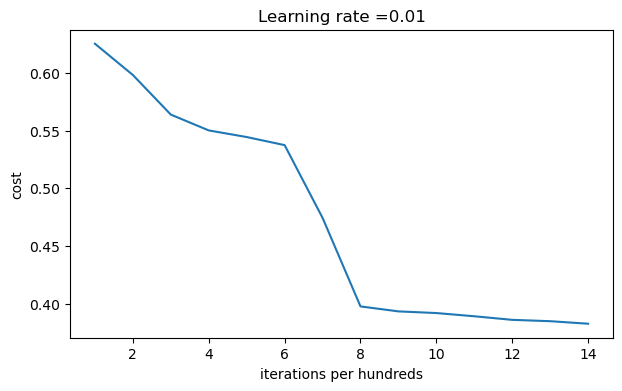

On the train set:
Accuracy: 0.83
On the test set:
Accuracy: 0.86


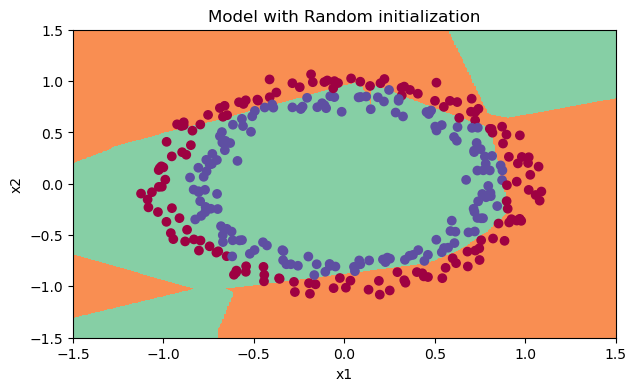

In [11]:
# For Random Initialization
params = NN_model(train_X, train_Y, lr = 0.01, n_iter = 15000, pc = True, init = "random")
print ("On the train set:")
predictions_train = predict(train_X, train_Y, params)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, params)

plt.title("Model with Random initialization")
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
plot_decision_boundary(lambda x: predict_dec(params, x.T), train_X, train_Y)

Cost after iteration 0: 0.8830537463419761
Cost after iteration 1000: 0.6879825919728063
Cost after iteration 2000: 0.6751286264523371
Cost after iteration 3000: 0.6526117768893807
Cost after iteration 4000: 0.6082958970572938
Cost after iteration 5000: 0.5304944491717495
Cost after iteration 6000: 0.41386458170717944
Cost after iteration 7000: 0.3117803464844441
Cost after iteration 8000: 0.23696215330322562
Cost after iteration 9000: 0.18597287209206836
Cost after iteration 10000: 0.1501555628037181
Cost after iteration 11000: 0.12325079292273544
Cost after iteration 12000: 0.09917746546525937
Cost after iteration 13000: 0.08457055954024277
Cost after iteration 14000: 0.07357895962677369


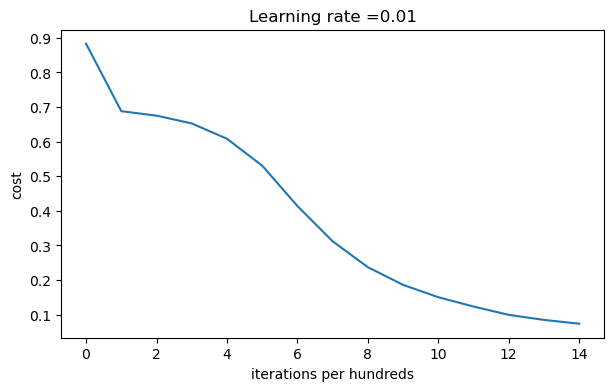

On the train set:
Accuracy: 0.9933333333333333
On the test set:
Accuracy: 0.96


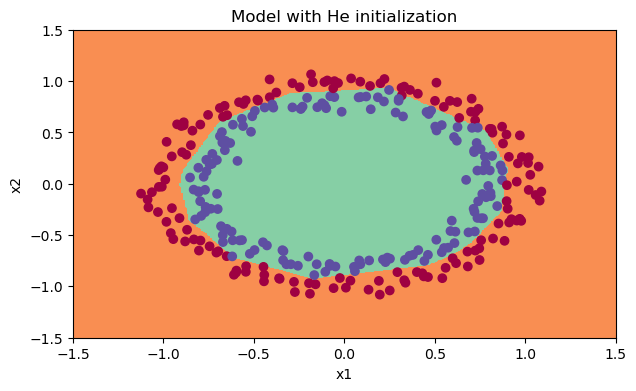

In [12]:
# For He Initialization
params = NN_model(train_X, train_Y, lr = 0.01, n_iter = 15000, pc = True, init = "he")
print ("On the train set:")
predictions_train = predict(train_X, train_Y, params)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, params)

plt.title("Model with He initialization")
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
plot_decision_boundary(lambda x: predict_dec(params, x.T), train_X, train_Y)

## Conclusion


You have seen three different types of initializations. For the same number of iterations and same hyperparameters the comparison is:

<table> 
    <tr>
        <td>
        Model
        </td>
        <td>
        Train accuracy
        </td>
        <td>
        Problem/Comment
        </td>
    </tr>
    <tr>
        <td>
            with zeros initialization
        </td>
        <td>
            50%
        </td>
        <td>
            fails to break symmetry
        </td>
    </tr>
    <tr>
        <td>
        3-layer NN with large random initialization
        </td>
        <td>
        83%
        </td>
        <td>
        too large weights 
        </td>
    </tr>
    <tr>
        <td>
        3-layer NN with He initialization
        </td>
        <td>
        99%
        </td>
        <td>
        recommended method
        </td>
    </tr>
</table> 